# Simple classification

In [ ]:
from enum import Enum
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np


# Enums for classifier variants
class ClassifierVariant(Enum):
    RandomForest = 1
    DecisionTree = 2
    SVM = 3
    KNN = 4
    NeuralNet = 5
    NaiveBayes = 6


# Load data
data2 = np.genfromtxt("../data/labels_features.csv", delimiter=",")
data2 = data2[1:, :]

# 131 records, 105 features and 1 class each
LABELS = data2[:, 1].astype(int)  # Only class telling real / fake
FEATURES = data2[:, 2:]  # Only features, no class
TARGET_NAMES = ["Metastasis, class 0", "No metastasis, class 1"]

# Define classifiers
classifiers = {
    ClassifierVariant.RandomForest: RandomForestClassifier(n_estimators=100),
    # ClassifierVariant.DecisionTree: DecisionTreeClassifier(max_depth=5),
    ClassifierVariant.SVM: SVC(kernel="linear", probability=True),
    ClassifierVariant.KNN: KNeighborsClassifier(n_neighbors=5),
    # ClassifierVariant.NeuralNet: MLPClassifier(alpha=1, max_iter=1000),
    ClassifierVariant.NaiveBayes: GaussianNB(),
}

# Define scoring metrics
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]


# Perform cross-validation and evaluate classifiers
def evaluate_classifiers(features, labels, classifiers, scoring):
    results = {variant: {} for variant in classifiers}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for variant, clf in classifiers.items():
        for score in scoring:
            scores = cross_val_score(clf, features, labels, cv=skf, scoring=score)
            results[variant][score] = np.mean(scores)

    return results


# Evaluate classifiers
evaluation_results = evaluate_classifiers(FEATURES, LABELS, classifiers, scoring)

# Print evaluation results
for variant, metrics in evaluation_results.items():
    print(f"Classifier: {variant.name}")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")
    print()

# Choose top classifiers based on a primary metric (e.g., accuracy)
top_classifiers = sorted(
    evaluation_results.items(), key=lambda item: item[1]["accuracy"], reverse=True
)[:3]
chosenClassifiers = [variant for variant, metrics in top_classifiers]

print("Chosen Classifiers:")
for classifier in chosenClassifiers:
    print(classifier.name)

# Simple w/ plot

In [1]:
import matplotlib.pyplot as plt
from enum import Enum
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


# Enums for classifier variants
class ClassifierVariant(Enum):
    RandomForest = 1
    DecisionTree = 2
    SVM = 3
    KNN = 4
    NeuralNet = 5
    NaiveBayes = 6


# Load data
data2 = np.genfromtxt("../data/labels_features.csv", delimiter=",")
data2 = data2[1:, :]

# 131 records, 105 features and 1 class each
LABELS = data2[:, 1].astype(int)  # Only class telling real / fake
FEATURES = data2[:, 2:]  # Only features, no class
TARGET_NAMES = ["Metastasis, class 0", "No metastasis, class 1"]

# Define classifiers
classifiers = {
    ClassifierVariant.RandomForest: RandomForestClassifier(n_estimators=100),
    # ClassifierVariant.DecisionTree: DecisionTreeClassifier(max_depth=5),
    ClassifierVariant.SVM: SVC(kernel="linear", probability=True),
    ClassifierVariant.KNN: KNeighborsClassifier(n_neighbors=5),
    # ClassifierVariant.NeuralNet: MLPClassifier(alpha=1, max_iter=1000),
    ClassifierVariant.NaiveBayes: GaussianNB(),
}

# Define scoring metrics
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]


# Perform cross-validation and evaluate classifiers
def evaluate_classifiers(features, labels, classifiers, scoring):
    results = {variant: {} for variant in classifiers}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for variant, clf in classifiers.items():
        for score in scoring:
            scores = cross_val_score(clf, features, labels, cv=skf, scoring=score)
            results[variant][score] = np.mean(scores)

    return results


# Evaluate classifiers
evaluation_results = evaluate_classifiers(FEATURES, LABELS, classifiers, scoring)

# Print evaluation results
for variant, metrics in evaluation_results.items():
    print(f"Classifier: {variant.name}")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")
    print()


# Plotting the results
def plot_evaluation_results(evaluation_results, scoring):
    n_metrics = len(scoring)
    n_classifiers = len(evaluation_results)

    fig, axes = plt.subplots(1, n_metrics, figsize=(20, 5), sharey=True)
    fig.suptitle("Classifier Comparison", fontsize=16)

    for i, metric in enumerate(scoring):
        scores = [evaluation_results[variant][metric] for variant in evaluation_results]
        classifiers_names = [variant.name for variant in evaluation_results]

        axes[i].barh(classifiers_names, scores, color="skyblue")
        axes[i].set_title(metric)
        axes[i].set_xlim(0, 1)
        for index, value in enumerate(scores):
            axes[i].text(value, index, f"{value:.2f}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Plot evaluation results
plot_evaluation_results(evaluation_results, scoring)

d:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Simple w/ plot and comparison

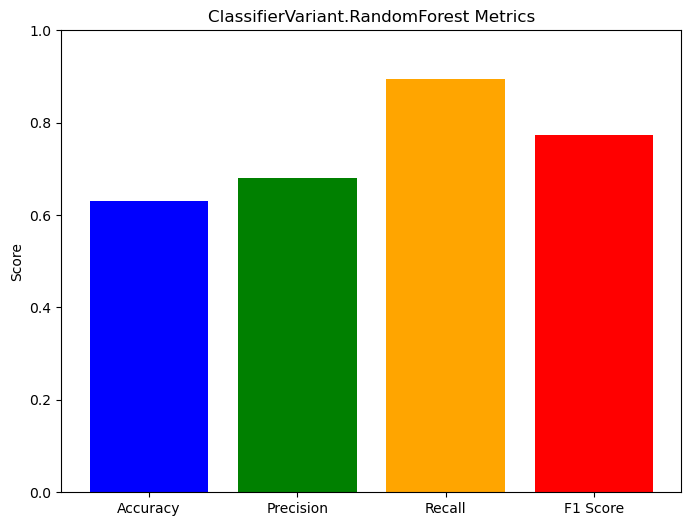

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from enum import Enum


# Enums for classifier variants
class ClassifierVariant(Enum):
    RandomForest = 1
    DecisionTree = 2
    SVM = 3
    KNN = 4
    NeuralNet = 5
    NaiveBayes = 6


# Define classifiers
classifiers = {
    ClassifierVariant.RandomForest: RandomForestClassifier(n_estimators=100),
    # ClassifierVariant.DecisionTree: DecisionTreeClassifier(max_depth=5),
    ClassifierVariant.SVM: SVC(kernel="linear", probability=True),
    ClassifierVariant.KNN: KNeighborsClassifier(n_neighbors=5),
    # ClassifierVariant.NeuralNet: MLPClassifier(alpha=1, max_iter=1000),
    ClassifierVariant.NaiveBayes: GaussianNB(),
}

# Load data
data2 = np.genfromtxt("../data/labels_features.csv", delimiter=",")
data2 = data2[1:, :]  # Assuming first row is header

# Separate features and labels
LABELS = data2[:, 1].astype(int)  # Assuming class labels are in the second column
FEATURES = data2[:, 2:]  # Assuming features start from the third column

# Define target names
TARGET_NAMES = ["Metastasis, class 0", "No metastasis, class 1"]

# Split data into train and test sets with stratify
X_train, X_test, y_train, y_test = train_test_split(
    FEATURES, LABELS, test_size=0.2, random_state=42, stratify=LABELS
)

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
classifier_names = []

# Iterate over chosen classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics and classifier name
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    classifier_names.append(name)

    # Plot progress
    plt.figure(figsize=(8, 6))
    plt.bar(
        ["Accuracy", "Precision", "Recall", "F1 Score"],
        [accuracy, precision, recall, f1],
        color=["blue", "green", "orange", "red"],
    )
    plt.title(f"{name} Metrics")
    plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.show()

# Plot overall comparison
plt.figure(figsize=(10, 8))
plt.barh(classifier_names, accuracy_scores, color="blue", label="Accuracy")
plt.barh(classifier_names, precision_scores, color="green", label="Precision")
plt.barh(classifier_names, recall_scores, color="orange", label="Recall")
plt.barh(classifier_names, f1_scores, color="red", label="F1 Score")
plt.xlabel("Score")
plt.title("Comparison of Metrics for Chosen Classifiers")
plt.legend()
plt.xlim(0, 1)
plt.show()